In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import seaborn as sns
pd.set_option('max_columns', 90)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = pd.concat((train, test)).reset_index(drop=True)

In [3]:
all_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# First Understand the Features

## Variable Type:
- `Ordinal` => Categorial + Ordering
- `Numerical`
- `Cardinal or Nominal` => Categorial + Not Ordered

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Get General Idea about the variables

In [6]:
def multi_table(table_list):
    return HTML(f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [8]:
multi_table([pd.DataFrame(all_data[i].value_counts()) for i in all_data.columns])

,PassengerId
1,1
861,1
879,1
878,1
877,1
...,...
436,1
435,1
434,1
433,1


# Classify the Variables

In [9]:
numerical_vars = ['Age', 'SibSp', 'Parch', 'Fare']
ordinal_vars = ['Pclass']
nominal_vars = ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

## DIstribution with repect to target variable

In [7]:
train0 = train[train.Survived == 0]
train1 = train[train.Survived == 1]
cnt = 0
detail_desc = []

for c in train.columns:
    if c == 'PassengerId':
        continue
#   To check int float and other numerical dtypes
    if train[c].dtypes != 'object':
        desc = pd.DataFrame(columns=['feature', 'data', 'type', 'count', 'mean', 'median', 'std', 'min', 'max', 'skew', 'null'])
        desc.loc[0] = [c, 'Train', train[c].dtype.name, train[c].count(), train[c].mean(), train[c].median(), train[c].std(), train[c].min(), train[c].max(), train[c].skew(), train[c].isnull().sum()]
        desc.loc[1] = [c, 'All', train[c].dtype.name, all_data[c].count(), all_data[c].mean(), all_data[c].median(), all_data[c].std(), all_data[c].min(), all_data[c].max(), all_data[c].skew(), all_data[c].isnull().sum()]
        desc.loc[2] = [c, 'Target=0', train0[c].dtype.name, train0[c].count(), train0[c].mean(), train0[c].median(), train0[c].std(), train0[c].min(), train0[c].max(), train0[c].skew(), train0[c].isnull().sum()]      
        desc.loc[3] = [c, 'Target=1', train1[c].dtype.name, train1[c].count(), train1[c].mean(), train1[c].median(), train1[c].std(), train1[c].min(), train1[c].max(), train1[c].skew(), train1[c].isnull().sum()]
        desc = desc.set_index(['feature', 'data'],drop=True)
        detail_desc.append(desc.style.background_gradient())
multi_table(detail_desc)

#  Categorial Variables vs Target Variable


In [17]:
def ordinal_dist(data, var, hue, msg_show=True):
    total_cnt = data[var].count()
    f, ax = plt.subplots(1, 2, figsize=(25, 8))
    hues = [None, hue]
    titles = [f"{var}'s distribution", f"{var}'s distribution by {hue}"]

    for i in range(2):
        sns.countplot(x = var, edgecolor='black', hue=hues[i], linewidth=4, ax=ax[i], data=data)
        ax[i].set_xlabel(var, weight='bold', size=13)
        ax[i].set_ylabel('Count', weight='bold', size=13)
#         ax[i].set_facecolor(BACKCOLOR)
        ax[i].spines[['top', 'right']].set_visible(False)
        ax[i].set_title(titles[i], size=15, weight='bold')
        for patch in ax[i].patches:
            x, height, width = patch.get_x(), patch.get_height(), patch.get_width()
            if msg_show:
                ax[i].text(x + width / 2, height + 3, f'{height} \n({height / total_cnt * 100:2.2f}%)', va='center', ha='center', size=12, bbox={'facecolor': 'white', 'boxstyle': 'round'})
    plt.show()

## Ordinal Variables

### Pclass
- 55%  -> 3rd class
- 21%  -> 2nd class
- 24%  -> 1st class

class 1 -> more chances of surviving. (62%) <br>
class 2 -> equal probab, slightly more for death.(53%) <br>
class 3 -> more chances of death. (76%)

In [22]:
# Aggregate Functions
train.pivot_table(index="Pclass", values="Survived", aggfunc=['count', 'sum', 'mean']).style.background_gradient(vmin=0)

,count,sum,mean
,Survived,Survived,Survived
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


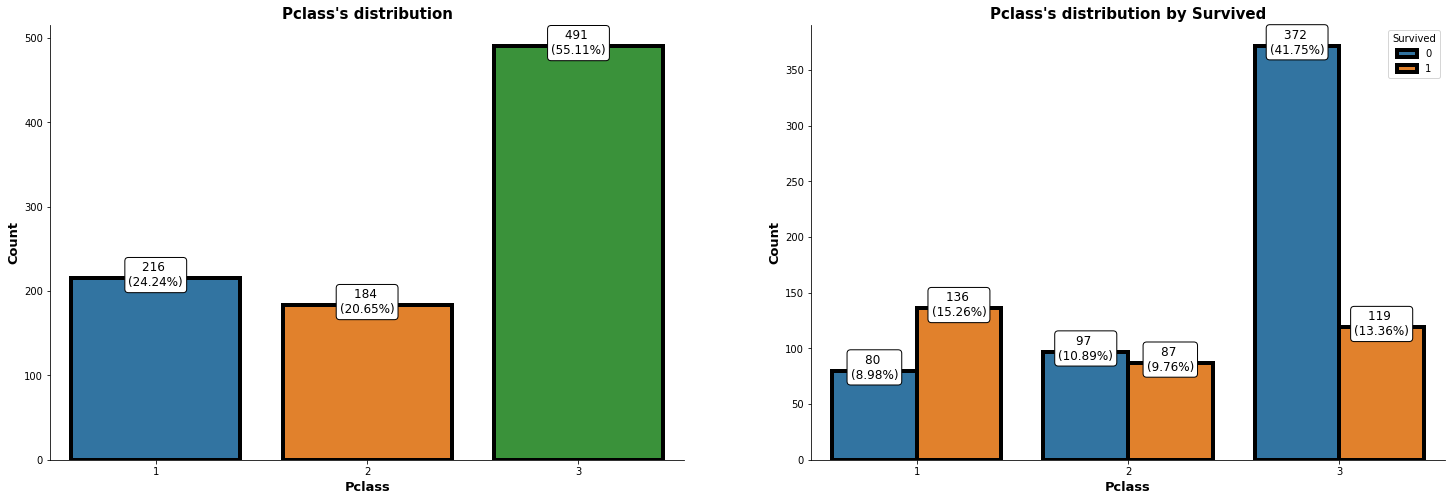

In [16]:
ordinal_dist(train, var='Pclass', hue='Survived')

## Nominal Variables


### Sex

- Male -> 65%
- Female -> 35% <br><br>
- Male -> Survival is 18%
- Female -> Survival is 74%

In [23]:
train.pivot_table(index='Sex',values='Survived',aggfunc=['count','sum','mean']).style.background_gradient(vmin=0)

,count,sum,mean
,Survived,Survived,Survived
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


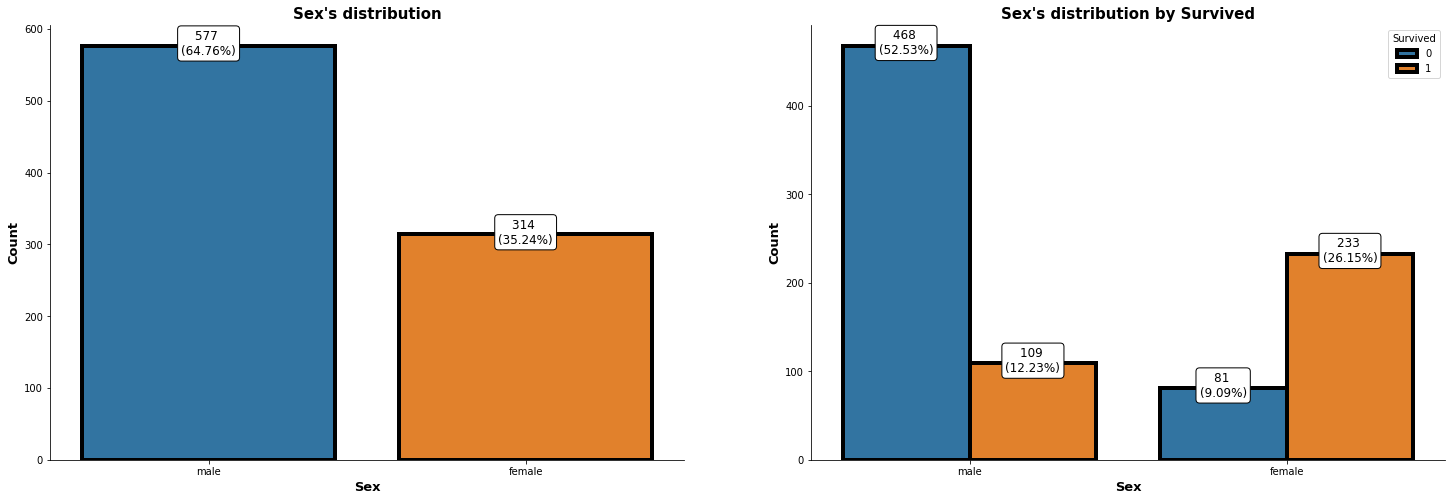

In [18]:
ordinal_dist(train, var='Sex', hue='Survived')

## Binary Variable (Combined two variable ) vs Target Attribute

classs 1 Female max and class 3 male least

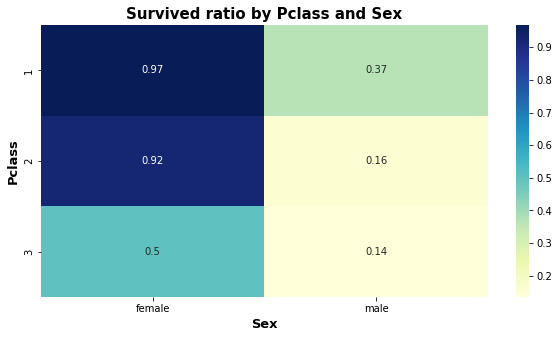

In [31]:
plt.subplots(figsize=(10, 5))
g = train.pivot_table(index='Pclass', columns='Sex', values='Survived')
g = sns.heatmap(g, annot=True, cmap="YlGnBu")
g.set_title('Survived ratio by Pclass and Sex', weight='bold', size=15)
g.set_xlabel('Sex', weight='bold', size=13)
g.set_ylabel('Pclass', weight='bold', size=13)
plt.show()

# Numerical Attributes vs Target Variable

In [32]:
def numerical_dist(data, x, y):
    f, ax = plt.subplots(1, 3, figsize=(35, 10))
    sns.violinplot(x=data[x], y=data[y], ax=ax[0], edgecolor='black', linewidth=5)
    sns.boxplot(x=data[x], y=data[y], ax=ax[1])
    sns.stripplot(x=data[x], y=data[y], ax=ax[2])
    for i in range(3):
        ax[i].spines[['top','right']].set_visible(False)
        ax[i].set_xlabel(x, weight='bold', size=20)
        ax[i].set_ylabel(y, weight='bold', size=20)
    f.suptitle(f"{y}'s distribution by {x}", weight='bold', size=25)
    plt.show()